In [2]:
# Can you see this?
3+4

7

I can write things in here!

# This is a header!  Wow!

I'm going to list some notes with bullet points:
 * this my first thing
 * this is my second thing
 
I'm going to make numbered notes:
  1. This will be number 1
  1. This will be number 2

In [3]:
4+5

9

5+6

This was an above insert.

This is markdown because I did `ESC-m`

This may not be important, but keep it in mind:

$ x = \frac{y}{5}$

This was an `ESC-b` for below cell

In [5]:
%matplotlib inline

I'm going to import a few plotting packages.

In [6]:
import matplotlib
import matplotlib.pyplot as plt # this makes the whole pyplot as a short hand "plt"
import datetime # is for formatting dates

# Let's change the font we are working with
matplotlib.rcParams['font.family'] = "sans-serif" # so rcParams is a way to set options across all plots in your nb

I'm going to import NumPy to deal with arrays of numbers.

In [7]:
import numpy as np # np is the short hand I'm going to use

In [8]:
time = [20070101, 20070401, 20070701, 20071001, 20080101, 20080401, 20080701, 20081001, 20090101]

In [9]:
time

[20070101,
 20070401,
 20070701,
 20071001,
 20080101,
 20080401,
 20080701,
 20081001,
 20090101]

I'm going to plot this dataset now using matplotlib:

Text(0, 0.5, 'YearMonthDay')

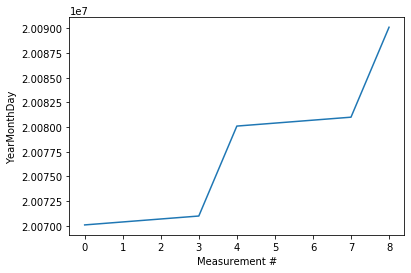

In [11]:
plt.plot(time)
# add in some x & y axis labels
plt.xlabel('Measurement #') # setting my x-label
plt.ylabel('YearMonthDay')

I also want to plot GDP:

In [13]:
gdp = [14233.2, 14422.3, 14569.7, 14685.3, 14668.4, 14813.0, 14843.0, 14549.9, 14383.9]
gdp

[14233.2,
 14422.3,
 14569.7,
 14685.3,
 14668.4,
 14813.0,
 14843.0,
 14549.9,
 14383.9]

Text(0, 0.5, 'GDP in Billions')

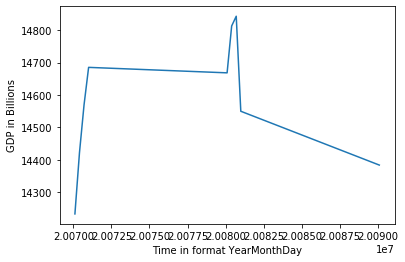

In [15]:
# plot GDP vs. time
plt.plot(time, gdp)
plt.xlabel('Time in format YearMonthDay')
plt.ylabel('GDP in Billions')

Text(0, 0.5, 'GDP in Billions')

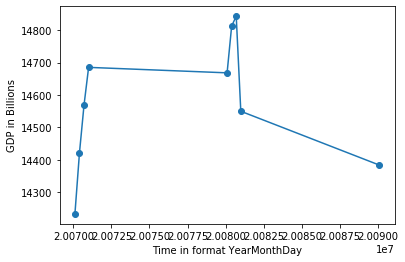

In [18]:
# plot GDP vs. time
plt.plot(time, gdp, 'o-')
plt.xlabel('Time in format YearMonthDay')
plt.ylabel('GDP in Billions')

In [19]:
from datetime import datetime # importing the "datetime" module from the "datetime" library

We are going to remind ourselves what a for-loop looks like and use it to make a formatted date list:

In [20]:
date = []
date

[]

In [22]:
for t in time:
    date.append( datetime.strptime(str(t), '%Y%m%d') )

In [23]:
date

[datetime.datetime(2007, 1, 1, 0, 0),
 datetime.datetime(2007, 4, 1, 0, 0),
 datetime.datetime(2007, 7, 1, 0, 0),
 datetime.datetime(2007, 10, 1, 0, 0),
 datetime.datetime(2008, 1, 1, 0, 0),
 datetime.datetime(2008, 4, 1, 0, 0),
 datetime.datetime(2008, 7, 1, 0, 0),
 datetime.datetime(2008, 10, 1, 0, 0),
 datetime.datetime(2009, 1, 1, 0, 0)]

We'll try replotting again with our formatted date's:

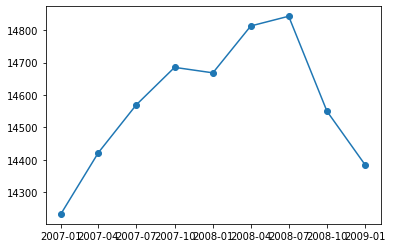

In [24]:
plt.plot(date, gdp, 'o-')

We might have time to make some time-lines, but for now we're going to make more complex plots with actual data.

# Using the full FRED dataset

We'll read in CSV files in a variety of ways, but for now we'll write our own converter (and we'll just go with it if it doesn't make 100% sense at this time).

In [25]:
def convert(value):
    convertedValue = datetime.strptime(value.decode('ascii'), '%Y-%m-%d')
    return convertedValue

We also have to specify the filename of our dataset:

In [26]:
myFredFile = '/Users/jillnaiman/Downloads/GDP.csv'

So this is another way to figure out where you've downloaded something:

In [28]:
!ls /Users/jillnaiman/Downloads

1310.8301.pdf             Naiman (1).pdf            boundaries2.png
CV_2019_uiuc.pdf          Octave-4.4.1-u1.dmg       boundaries3.png
DropboxInstaller.dmg      Online Return Center.pdf  download.html
Emacs-26.3-universal.dmg  Online Return Center2.pdf get-pip.py
GDP (1).csv               PocketCasts.zip           googlechrome.dmg
GDP (2).csv               RStudio-1.2.5033.dmg      hw1HRdata.csv
GDP.csv                   Skype-8.55.0.141.dmg      l1_trialData (1).csv
GN08EM.pdf                Slack-4.2.0-macOS.dmg     l1_trialData.csv
Health Alliance.pdf       TunnelBear.app            stitch_reworked (1).png
IS542AO_syllabus.pdf      TunnelBear.zip            stitch_reworked.png
MacTeX.pkg                Zoom.pkg                  test_imports_week01.ipynb
NAIMAN.pdf                boundaries1.png


In [29]:
#myFredFile = '~/Downloads/GDP.csv'

We have to tell NumPy the format of our data:

In [30]:
type(5)

int

In [31]:
type(time)

list

In [33]:
myFredType = np.dtype( [ ("date", datetime), ("gdp", np.float64) ]  )

FINALLY we can read in our file:

In [41]:
myDict = {'v1': 'bob', 3: 'steve'}

In [44]:
myDict['v1']

'bob'

In [45]:
def convert(value):
    convertedValue = datetime.strptime(value.decode('ascii'), '%Y-%m-%d')
    return convertedValue

myFredFile = '/Users/jillnaiman/Downloads/GDP.csv'

myFredType = np.dtype( [ ("date", datetime), ("gdp", np.float64) ]  )

with open(myFredFile, 'r') as f:
    data = np.loadtxt(f, skiprows=1, delimiter=',', converters={0: convert}, dtype=myFredType)

In [39]:
data

array([(datetime.datetime(1947, 1, 1, 0, 0),   243.164),
       (datetime.datetime(1947, 4, 1, 0, 0),   245.968),
       (datetime.datetime(1947, 7, 1, 0, 0),   249.585),
       (datetime.datetime(1947, 10, 1, 0, 0),   259.745),
       (datetime.datetime(1948, 1, 1, 0, 0),   265.742),
       (datetime.datetime(1948, 4, 1, 0, 0),   272.567),
       (datetime.datetime(1948, 7, 1, 0, 0),   279.196),
       (datetime.datetime(1948, 10, 1, 0, 0),   280.366),
       (datetime.datetime(1949, 1, 1, 0, 0),   275.034),
       (datetime.datetime(1949, 4, 1, 0, 0),   271.351),
       (datetime.datetime(1949, 7, 1, 0, 0),   272.889),
       (datetime.datetime(1949, 10, 1, 0, 0),   270.627),
       (datetime.datetime(1950, 1, 1, 0, 0),   280.828),
       (datetime.datetime(1950, 4, 1, 0, 0),   290.383),
       (datetime.datetime(1950, 7, 1, 0, 0),   308.153),
       (datetime.datetime(1950, 10, 1, 0, 0),   319.945),
       (datetime.datetime(1951, 1, 1, 0, 0),   336.   ),
       (datetime.datetime(1

We're going to make a FRED GDP vs. time plot, using a slightly different interface:

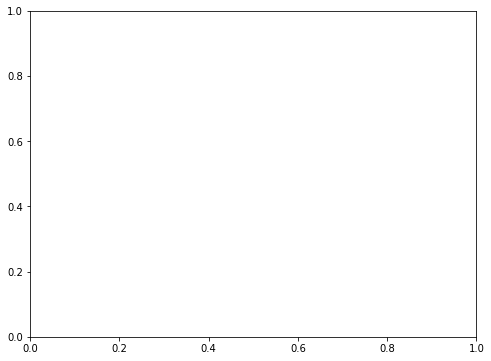

In [50]:
fig, ax = plt.subplots(figsize=(8,6))

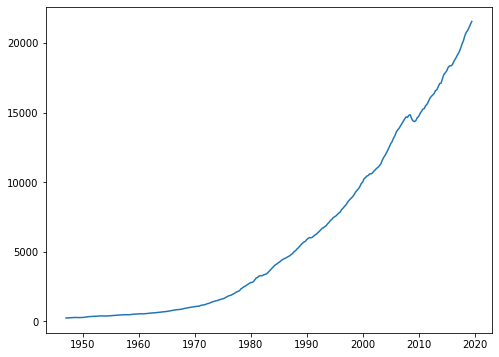

In [52]:
fig, ax = plt.subplots(figsize=(8,6))

# before we did plt.plot
ax.plot_date(data["date"], data["gdp"], '-')

plt.show() # this gets rid of the print memory address thing

Let's try a different "style" of plot using one of the style variables in matplotlib

In [53]:
print(plt.style.available)

['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'fast', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'Solarize_Light2', 'seaborn-paper', 'bmh', 'tableau-colorblind10', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep']


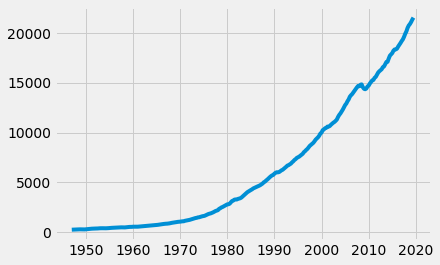

In [55]:
style = 'fivethirtyeight' # selecting the style of my plot
with plt.style.context(style): # so this assures that *only* this plot uses this style
    fig, ax = plt.subplots(figsize=(6,4))
    ax.plot_date(data["date"], data["gdp"], '-')
    plt.show() # this gets rid of the print memory address thing

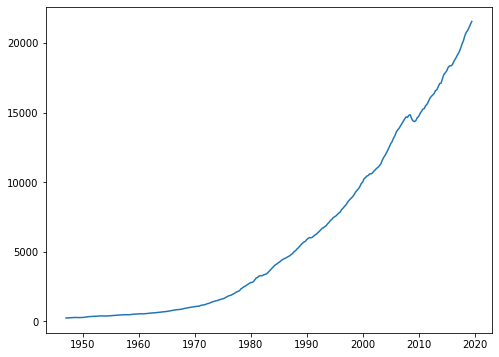

In [56]:
fig, ax = plt.subplots(figsize=(8,6))

# before we did plt.plot
ax.plot_date(data["date"], data["gdp"], '-')

plt.show() # this gets rid of the print memory address thing

In [57]:
def make_gdp_plot(style): # so I can reuse this with different styles
    with plt.style.context(style): # so this assures that *only* this plot uses this style
        fig, ax = plt.subplots(figsize=(6,4))
        ax.plot_date(data["date"], data["gdp"], '-')
        plt.show() # this gets rid of the print memory address thing

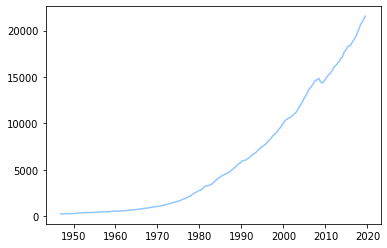

In [60]:
make_gdp_plot('seaborn-pastel')

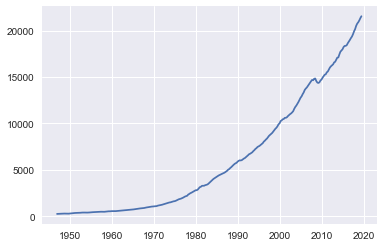

In [61]:
make_gdp_plot('seaborn')

We can already see that we might want to make this into some sort of user-interface that is interactive.

# Manipulating images with matplotlib

In [62]:
import PIL.Image as Image

In [63]:
im = Image.open("/Users/jillnaiman/Downloads/stitch_reworked.png")

In [74]:
im.show()

In [67]:
#im # shows image inline

In [68]:
im_data = np.array(im)

In [70]:
#im_data # image into data

How big is this data?  I.e. how many pixels in this image?

In [71]:
im_data.shape # R= red, G = green, B = blue, A = opacity

(483, 430, 4)

In [73]:
np.unique(im_data[:,:,0])

array([  0, 126, 255], dtype=uint8)